# <font color=black> <center><font size =18> Case Study: Modeling & Alternative data </font>
 

<font> <center>![](https://www.startup.ch/demandit/files/M_BB941CC4DCEF687AD98/dms//Image/download%20(1)1.png)

# 0. Preparation :

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import lightgbm as lgbm 
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
# Load the datas
data = pd.read_csv("../input/part1/data.csv")

In [3]:
data = pd.DataFrame(data)
for c in data.columns :
    data[c] = data[c].replace([np.inf, -np.inf],np.nan)
    data[c] = data[c].fillna(data[c].mean())

# 1. Modeling:

### Data preperation :

In [4]:
X = data[[c for c in data.columns if c!="Taux"]].values # Datas
Y = data["Taux"].values  # Target values 
xtr,xts,ytr,yts = train_test_split(X,Y,test_size= 0.1,shuffle=True,random_state=42)

### LGBM model :

In [5]:
params={"num_leaves":300,
       "max_bin":450,
       "feature_fraction":0.52,
       "bagging_fraction":0.52,
       "objective":"regression",
       "learning_rate":0.05,
       "boosting_type":"gbdt",
       "metric":"mse"
       }

d_train = lgbm.Dataset(xtr,label=ytr)
d_eval = lgbm.Dataset(xts,label=yts,reference=d_train)
clf = lgbm.train(params,d_train,valid_sets=[d_train,d_eval],num_boost_round=600,\
                    early_stopping_rounds=20,verbose_eval=50)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000831 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6185
[LightGBM] [Info] Number of data points in the train set: 450, number of used features: 86
[LightGBM] [Info] Start training from score 5.971756
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

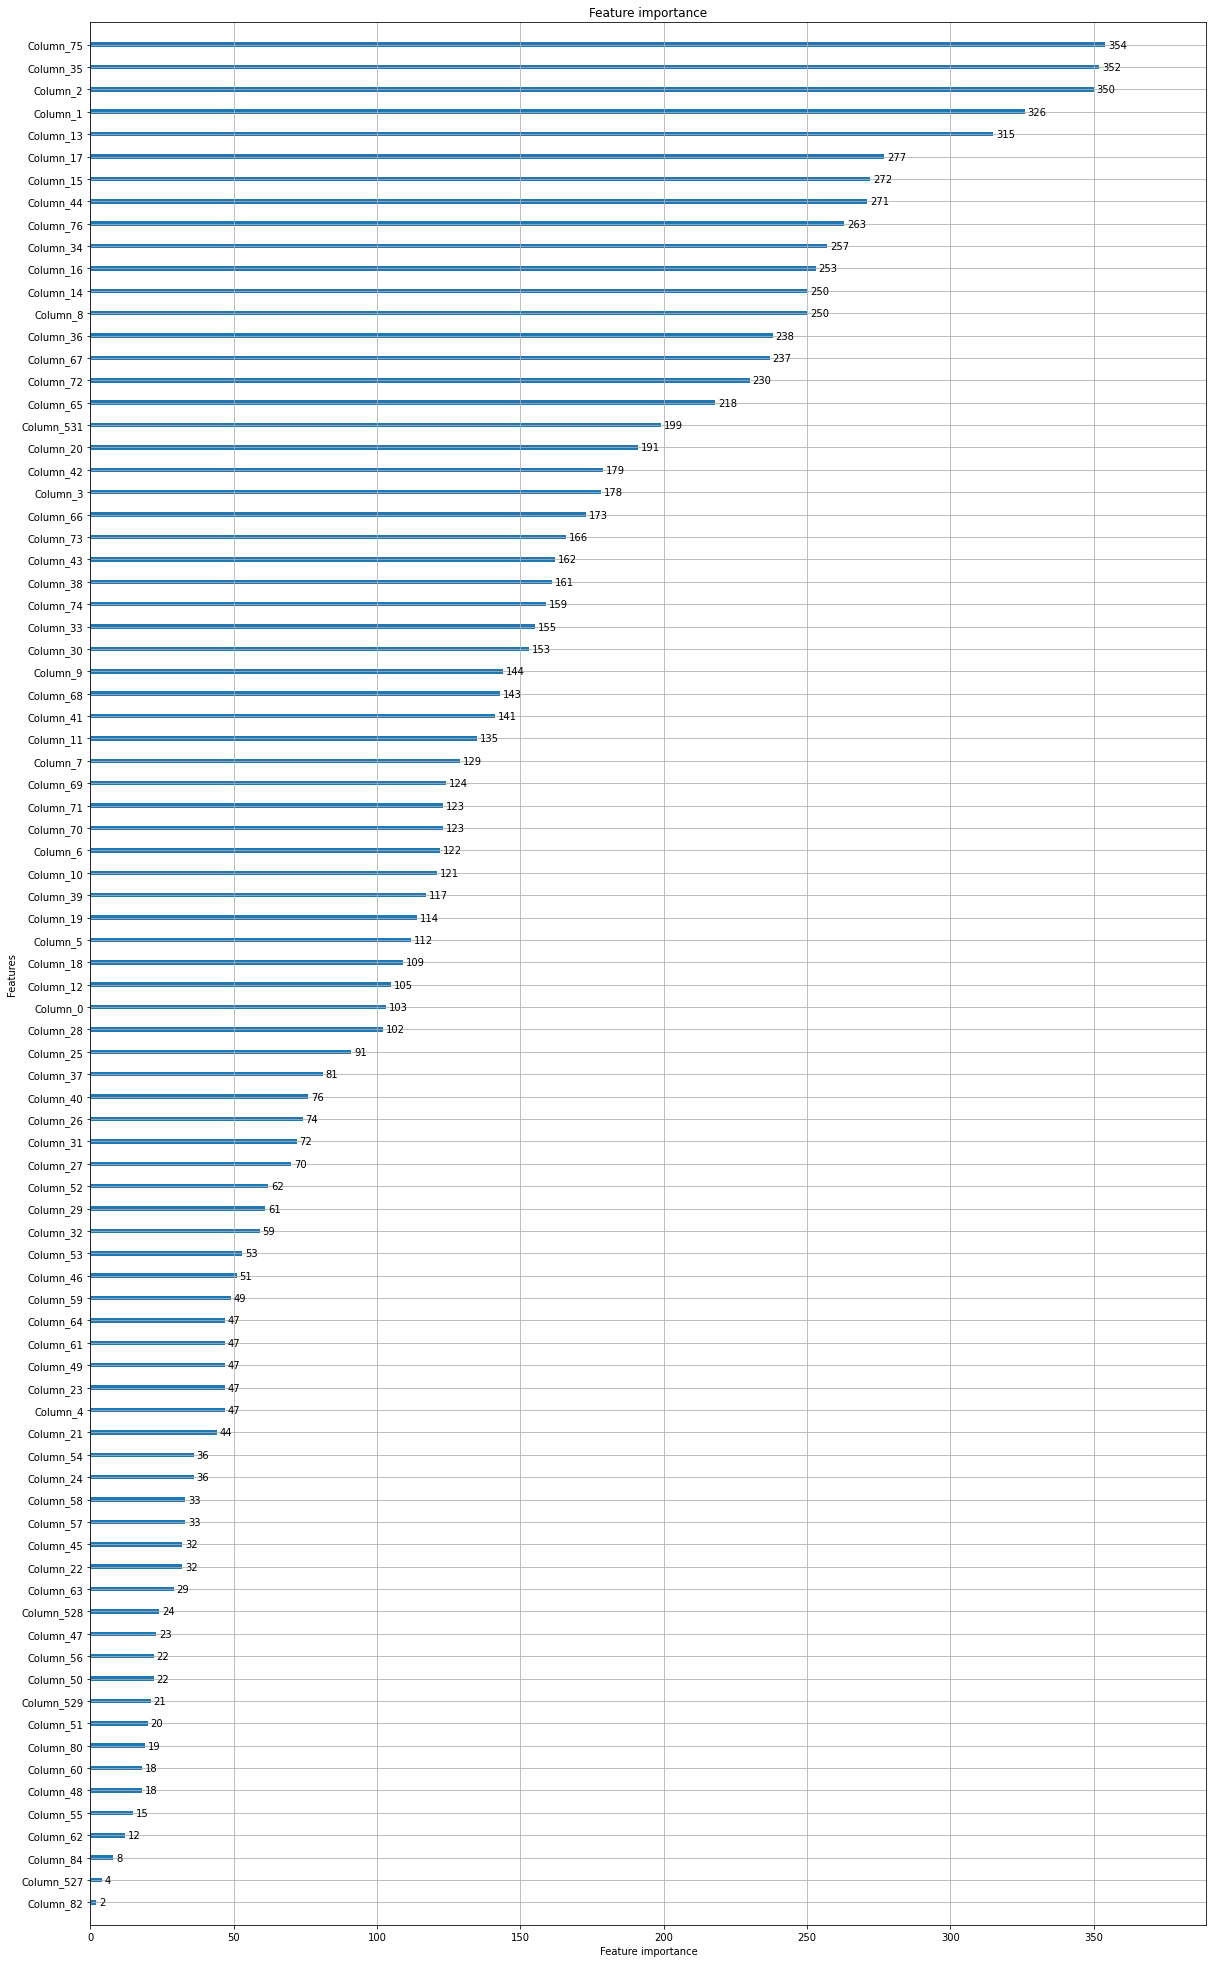

In [6]:
fig,ax = plt.subplots(figsize=(20,35))
lgbm.plot_importance(clf,ax=ax)

### Random Forest :

In [7]:
# Build and fine tunning the model.
rf = RandomForestRegressor()
params = {"max_features":[(i * 5) for i in range((X.shape[1])//(5))]}
gr_rf = GridSearchCV(rf,params,cv=5)
gr_rf.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [0, 5, 10, 15, 20, 25, 30, 35, 40, 45,
                                          50, 55, 60, 65, 70, 75, 80, 85, 90,
                                          95, 100, 105, 110, 115, 120, 125, 130,
                                          135, 140, 145, ...]})

In [8]:
# Display best hyperparametrs 
gr_rf.best_params_

{'max_features': 495}

In [9]:
# Performance of Random Forest estimator.
ypred = gr_rf.predict(xts)
sc_rf = mean_squared_error(yts,ypred)
print(f" The mean squared error for Random forest estimator = {sc_rf}")

 The mean squared error for Random forest estimator = 0.008917812600000028


### Nearst Neighbors

In [10]:
NN = KNeighborsRegressor()
params = {"n_neighbors":[2,4,6,8,10]}
gr_nn = GridSearchCV(NN,params,cv=5)
gr_nn.fit(xtr,ytr)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10]})

In [11]:
# Display best hyperparametrs 
gr_nn.best_params_

{'n_neighbors': 2}

In [12]:
# Performance of NNeighbors estimator.
ypr = gr_nn.predict(xts)
sc_nn = mean_squared_error(yts,ypr)
print(f" The mean squared error for Random forest estimator = {sc_nn}")

 The mean squared error for Random forest estimator = 0.05660000000000001


### Best Model :

<AxesSubplot:>

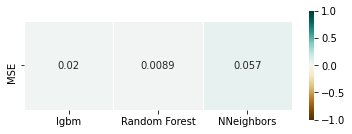

In [13]:
model_perf = pd.DataFrame({"lgbm": 0.02 ,"Random Forest":sc_rf,"NNeighbors":sc_nn},\
                         index=["MSE"])
sns.heatmap(model_perf,cmap='BrBG',annot=True,square=True,vmin=-1,vmax=1,\
            linewidths=0.5,cbar_kws={"shrink": .5})

> As we can notice from the above table, that the results are very close. However, the most important is to consider the following points :

 - Lgbm : Lgbm : is a powerful algorhitm especialy for times series tasks. It 's known by his faster training speed and his higher efficiency. it is vey popular in kaggle and he had allowed to win many competition. However, Above his yield performance in our case, he is not adivasble for small dataset as our case. We always recommend it for dataset larger than 10000 rows. So it's highly recommended to modeling our problem by this method if we will have more datas
 - RandomForest : this method give the best result in our case. So it's the best fit for our case. Besides, this method belong to ensemble methods, so can give alwayse the advantage to decrease variance. This method, can allows also to avoid the overfit  by combining votes which could be a distinguish criterion for our case with very small dataset.

# 2. Alternative data

### Question 1 :

> I think to improve the quality of the previous predictive model, we should work on the following points : 

- Collect more datas : This will allow us, in one hand to use more powerful method like lgbm and deep learning algorhitms , in the other hand will help our methods to learn more informations and better generalize. 
- Include more features and attributs : Indeed, we should include more features in our analysis. In order to find which they can help to predict the solvency of the customer in short and long terms . The alternative datas , can really be a good way to improve the quality of our predictive model. It can allows us to get more information about the customers of the compagnie satisfaction by analysing customers reviews for example. It can allow also to get a real time tracking of the business and the situation of the compagnie.

==> I think alternative datas can immensly improve the quality of our predictive model, because it will help us to get informations about the real situation of the compagnie. Since it can allows to get ideas about their customer assesment and the real time running of the compagnie.

### Question 2 :

Generative datas is to collect datas about compagnies by scrapping their websites and their social profiles . This approach could be a good way to increase the performance of our predictive model as we had explain in the previous question. Indeed, it will help to get informations about the running business of the compagnie, their customers assesment and satisfaction, their solvancy with their supplier , their websites traffic  ... theses datas could give precios informations about the solvancy of the compagnie in short and long terms.

### Question 3 :


the data sources that we can use to have better predictive model :  
    - Kaggle Dataset : free sources with huge amounts of dataset (https://www.kaggle.com/datasets) .          
    - ProPublica Data Store : not free source  with many dataset related to Business Loan (https://www.propublica.org/datastore/collection/loans )         
    
    
We can also use web scrapping technics to get datas from websites.